<a href="https://colab.research.google.com/github/saianusha10/Hands_on_6/blob/main/Hands_0n6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
'''1. Implement both versions of quicksort (random and non-random choice for the pivot)'''

#Quicksort for non-random version
def quicksort_non_random(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]  # taking middle element as pivot
        less = [x for x in arr if x < pivot]
        equal = [x for x in arr if x == pivot]
        greater = [x for x in arr if x > pivot]
        return quicksort_non_random(less) + equal + quicksort_non_random(greater)
arr = [3, 5, 6, 10, 1, 2]
sorted_arr = quicksort_non_random(arr)
print("Sorted array for non-random pivot:", sorted_arr)

#Quiksort for random version
import random
def quicksort_random(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = random.choice(arr)  # randomly selecting a pivot
        less = [x for x in arr if x < pivot]
        equal = [x for x in arr if x == pivot]
        greater = [x for x in arr if x > pivot]
        return quicksort_random(less) + equal + quicksort_random(greater)
arr = [3, 5, 6, 10, 1, 2]
sorted_arr = quicksort_random(arr)
print("Sorted array for random pivot:", sorted_arr)



Sorted array for non-random pivot: [1, 2, 3, 5, 6, 10]
Sorted array for random pivot: [1, 2, 3, 5, 6, 10]


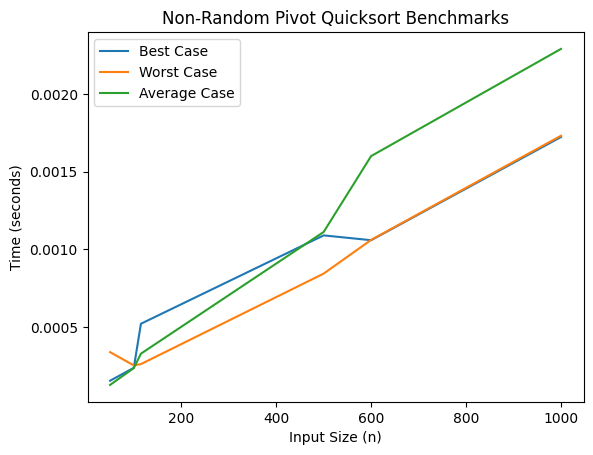

In [10]:
'''2.  For the non-random pivot version of quicksort show the following benchmarks on the same graph:

    2a) best case (generate a set of inputs that will always be the best case, repeat for multiple array input sizes "n").

    2b) worst case (generate a set of inputs that will always be the worst case, repeat for multiple array input sizes "n").

    2c) average case (generate a set of inputs from a uniform distribution, repeat for multiple array input sizes "n").'''


import time
import matplotlib.pyplot as plt

#function to measure the time for sorting
def time_sort(sort_func, arr):
    start = time.time()
    sort_func(arr)
    end = time.time()
    return end - start

# Benchmarking the non-random quicksort
def benchmark_quicksort():
    input_sizes = [50, 100, 115, 500, 600, 1000]
    best_case_times = []
    worst_case_times = []
    average_case_times = []

    for n in input_sizes:
        # Best case: already sorted input
        best_case_input = list(range(n))
        best_case_times.append(time_sort(quicksort_non_random, best_case_input))

        # Worst case: reverse sorted input
        worst_case_input = list(range(n, 0, -1))
        worst_case_times.append(time_sort(quicksort_non_random, worst_case_input))

        # Average case: random input
        average_case_input = [random.randint(0, n) for _ in range(n)]
        average_case_times.append(time_sort(quicksort_non_random, average_case_input))

    # Plotting the results
    plt.plot(input_sizes, best_case_times, label="Best Case")
    plt.plot(input_sizes, worst_case_times, label="Worst Case")
    plt.plot(input_sizes, average_case_times, label="Average Case")
    plt.xlabel("Input Size (n)")
    plt.ylabel("Time (seconds)")
    plt.title("Non-Random Pivot Quicksort Benchmarks")
    plt.legend()
    plt.show()

# Run the benchmark
benchmark_quicksort()


Q3. Mathematically derive the average runtime complexity of the non-random pivot version of quicksort.

Best Case: The pivot always splits array into two equal half so we get a perfectly balanced binary tree. here, the recursion depth is log(n), therefore the overall complexity should be O(n log n).

Worst Case: The pivot always produces the most unbalanced partition (one element in one partition and n-1 elements in the other).here, the recursion depth becomes n. therefore, the worst-case complexity is O(n^2).

Average Case:
We assume that the pivot, on average, splits the array into two parts such that one part has about k elements and the other has n-k elements, with k uniformly distributed between 0 and n-1.

The recurrence relation for average case complexity should be,
T(n)=n+(1/n)[ n−1∑i=0(T(k)+T(n−1−k))]+O(n)

therefore after simplification the average case complexity is O(n log n).